## Exploratory Data analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
project_path = ""
data_path = """

In [3]:
os.chdir(project_path)

In [4]:
from janestreet.data import JaneData

In [5]:
jane_street = JaneData(data_path)

Done Loading Jane Data
Using seed data None


In [6]:
train_data = jane_street.train_df

In [7]:
train_data.shape

(2390491, 138)

In [8]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [9]:
feature_col = [f"feature_{i}" for i in range(130)]

In [10]:
columns_nan_count = train_data.isna().sum()
for i in range(130):
    feature = feature_col[i]
    print(feature + ":" + str(columns_nan_count[feature]))

feature_0:0
feature_1:0
feature_2:0
feature_3:448
feature_4:448
feature_5:0
feature_6:0
feature_7:393135
feature_8:393135
feature_9:788
feature_10:788
feature_11:80015
feature_12:80015
feature_13:15353
feature_14:15353
feature_15:6683
feature_16:6683
feature_17:395535
feature_18:395535
feature_19:788
feature_20:788
feature_21:81444
feature_22:81444
feature_23:15353
feature_24:15353
feature_25:6683
feature_26:6683
feature_27:395535
feature_28:395535
feature_29:788
feature_30:788
feature_31:81444
feature_32:81444
feature_33:15353
feature_34:15353
feature_35:6683
feature_36:6683
feature_37:0
feature_38:0
feature_39:0
feature_40:0
feature_41:0
feature_42:0
feature_43:0
feature_44:448
feature_45:448
feature_46:0
feature_47:0
feature_48:0
feature_49:0
feature_50:0
feature_51:0
feature_52:0
feature_53:0
feature_54:0
feature_55:68409
feature_56:719
feature_57:0
feature_58:1
feature_59:48
feature_60:0
feature_61:0
feature_62:0
feature_63:0
feature_64:0
feature_65:0
feature_66:0
feature_67:0
fea

In [11]:
len(np.where(columns_nan_count >= 350000)[0])
bad_behaved = np.where(columns_nan_count >= 350000)[0]
bad_cols = [feature_col[c] for c in bad_behaved]

<AxesSubplot:ylabel='Density'>

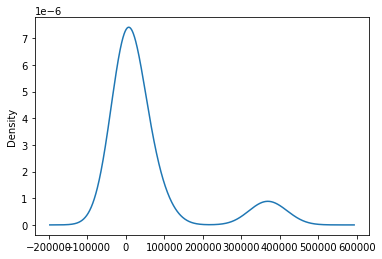

In [12]:
columns_nan_count[feature_col].plot(kind="density")

In [13]:
bad_cols_subs = [bad_cols[i] for i in range(6)]

In [14]:
corr = train_data[bad_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature_14,feature_15,feature_24,feature_25,feature_34,feature_35,feature_79,feature_85,feature_91,feature_97,feature_103,feature_109,feature_115,feature_121
feature_14,1.00,0.54,0.40,0.20,0.39,0.16,-0.02,0.11,0.03,0.14,0.06,0.26,0.10,0.04
feature_15,0.54,1.00,0.30,0.39,0.23,0.27,-0.04,0.13,0.02,0.19,0.09,0.36,0.15,-0.02
feature_24,0.40,0.30,1.00,0.80,-0.58,-0.59,-0.38,-0.37,-0.34,0.46,0.33,0.11,0.06,0.03
feature_25,0.20,0.39,0.80,1.00,-0.54,-0.69,-0.44,-0.42,-0.39,0.53,0.40,0.13,0.09,0.01
feature_34,0.39,0.23,-0.58,-0.54,1.00,0.78,0.35,0.43,0.36,-0.35,-0.27,0.07,0.03,0.04
feature_35,0.16,0.27,-0.59,-0.69,0.78,1.00,0.44,0.51,0.44,-0.45,-0.34,0.05,0.03,0.01
feature_79,-0.02,-0.04,-0.38,-0.44,0.35,0.44,1.00,0.57,0.72,-0.60,-0.78,-0.05,-0.10,0.00
feature_85,0.11,0.13,-0.37,-0.42,0.43,0.51,0.57,1.00,0.74,-0.24,-0.22,0.56,0.36,-0.06
feature_91,0.03,0.02,-0.34,-0.39,0.36,0.44,0.72,0.74,1.00,-0.27,-0.16,0.33,0.58,-0.03
feature_97,0.14,0.19,0.46,0.53,-0.35,-0.45,-0.60,-0.24,-0.27,1.00,0.70,0.62,0.40,-0.06


array([[<AxesSubplot:xlabel='feature_14', ylabel='feature_14'>,
        <AxesSubplot:xlabel='feature_15', ylabel='feature_14'>,
        <AxesSubplot:xlabel='feature_24', ylabel='feature_14'>,
        <AxesSubplot:xlabel='feature_25', ylabel='feature_14'>,
        <AxesSubplot:xlabel='feature_34', ylabel='feature_14'>,
        <AxesSubplot:xlabel='feature_35', ylabel='feature_14'>],
       [<AxesSubplot:xlabel='feature_14', ylabel='feature_15'>,
        <AxesSubplot:xlabel='feature_15', ylabel='feature_15'>,
        <AxesSubplot:xlabel='feature_24', ylabel='feature_15'>,
        <AxesSubplot:xlabel='feature_25', ylabel='feature_15'>,
        <AxesSubplot:xlabel='feature_34', ylabel='feature_15'>,
        <AxesSubplot:xlabel='feature_35', ylabel='feature_15'>],
       [<AxesSubplot:xlabel='feature_14', ylabel='feature_24'>,
        <AxesSubplot:xlabel='feature_15', ylabel='feature_24'>,
        <AxesSubplot:xlabel='feature_24', ylabel='feature_24'>,
        <AxesSubplot:xlabel='feature_2

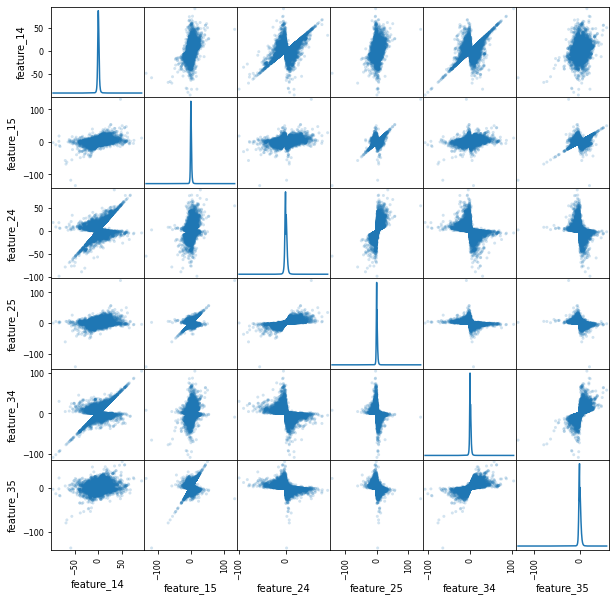

In [15]:
pd.plotting.scatter_matrix(train_data[bad_cols_subs],diagonal="kde", alpha=0.2,figsize=(10,10))

array([[<AxesSubplot:xlabel='feature_55', ylabel='feature_55'>,
        <AxesSubplot:xlabel='feature_56', ylabel='feature_55'>,
        <AxesSubplot:xlabel='feature_57', ylabel='feature_55'>,
        <AxesSubplot:xlabel='feature_58', ylabel='feature_55'>,
        <AxesSubplot:xlabel='feature_59', ylabel='feature_55'>],
       [<AxesSubplot:xlabel='feature_55', ylabel='feature_56'>,
        <AxesSubplot:xlabel='feature_56', ylabel='feature_56'>,
        <AxesSubplot:xlabel='feature_57', ylabel='feature_56'>,
        <AxesSubplot:xlabel='feature_58', ylabel='feature_56'>,
        <AxesSubplot:xlabel='feature_59', ylabel='feature_56'>],
       [<AxesSubplot:xlabel='feature_55', ylabel='feature_57'>,
        <AxesSubplot:xlabel='feature_56', ylabel='feature_57'>,
        <AxesSubplot:xlabel='feature_57', ylabel='feature_57'>,
        <AxesSubplot:xlabel='feature_58', ylabel='feature_57'>,
        <AxesSubplot:xlabel='feature_59', ylabel='feature_57'>],
       [<AxesSubplot:xlabel='feature_

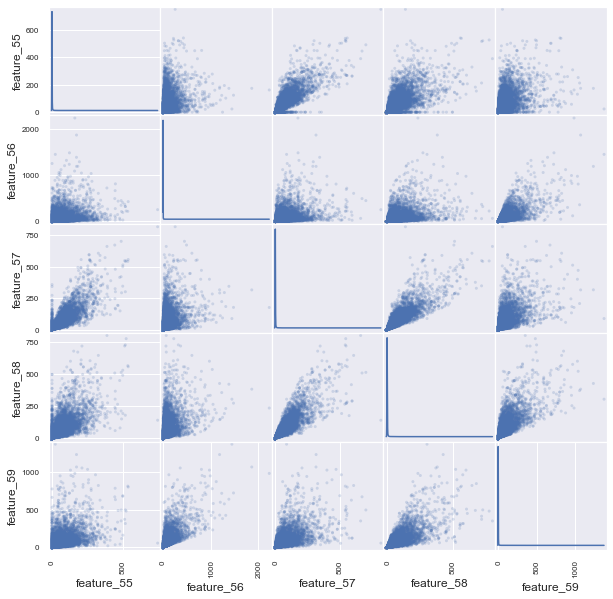

In [57]:
pd.plotting.scatter_matrix(train_data[[f"feature_{i}" for i in range(55,60)]],diagonal="kde", alpha=0.2,figsize=(10,10))

In [16]:
train_data[bad_cols_subs].describe()

,feature_14,feature_15,feature_24,feature_25,feature_34,feature_35
count,2.375138e+06,2.383808e+06,2.375138e+06,2.383808e+06,2.375138e+06,2.383808e+06
mean,8.902722e-02,2.116776e-01,2.385608e-01,2.940708e-01,3.353533e-01,3.414531e-01
std,2.065389e+00,1.885308e+00,2.662480e+00,2.077046e+00,2.120443e+00,2.419053e+00
min,-9.530297e+01,-1.345932e+02,-9.894913e+01,-1.414527e+02,-1.075372e+02,-1.353354e+02
25%,-9.088217e-01,-8.900544e-01,-1.280716e+00,-9.666323e-01,-7.767281e-01,-1.163449e+00
50%,0.000000e+00,-4.422142e-07,0.000000e+00,-6.980706e-17,0.000000e+00,-9.450177e-17
75%,9.946605e-01,1.109420e+00,1.650103e+00,1.331495e+00,1.342738e+00,1.634194e+00
max,9.109579e+01,1.310842e+02,8.862731e+01,1.386662e+02,1.037131e+02,5.920219e+01


In [17]:
num_with_na = train_data.shape[0] - train_data.dropna().shape[0]

In [18]:
num_with_na / float(train_data.shape[0])

0.16612444891028663

Decided to replace missing values with their mean. Dropping columns or rows at this point I think is not necessary. 

In [19]:
train_data = train_data.apply(lambda x: x.fillna(x.mean()),axis=0)

In [20]:
train_data.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,...,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,...,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01,1.195245e+06
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02,9.999518e-01,2.559373e+00,2.477335e+00,...,2.142235e+00,2.087745e+00,1.977551e+00,1.736716e+00,2.235295e+00,2.529801e+00,1.792525e+00,2.306203e+00,1.764710e+00,6.900755e+05
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00,0.000000e+00
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03,-1.000000e+00,-1.299334e+00,-1.263628e+00,...,-1.086590e+00,-1.114226e+00,-9.510947e-01,-9.075421e-01,-1.203372e+00,-1.447386e+00,-8.956381e-01,-1.277279e+00,-8.536697e-01,5.976225e+05
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05,1.000000e+00,-1.870182e-05,-7.200577e-07,...,6.852204e-02,2.406855e-04,2.158023e-04,1.389794e-02,1.633590e-02,1.141689e-02,7.021824e-03,2.185970e-03,1.461374e-03,1.195245e+06
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03,1.000000e+00,1.578417e+00,1.526399e+00,...,1.291389e+00,1.405731e+00,1.308463e+00,1.217698e+00,1.397533e+00,1.759022e+00,1.106298e+00,1.581004e+00,1.124167e+00,1.792868e+06
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390490e+06


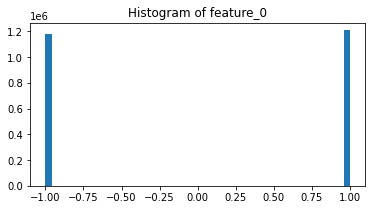

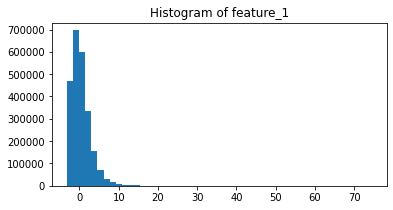

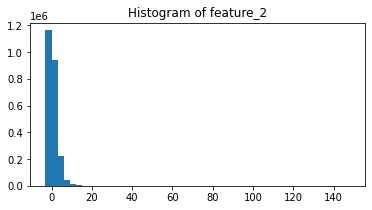

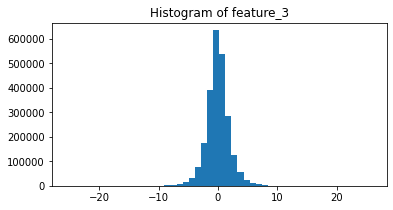

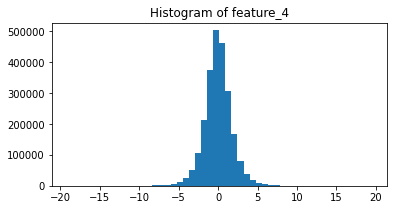

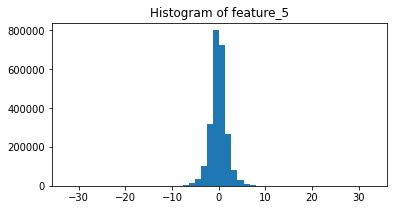

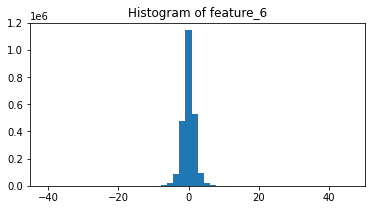

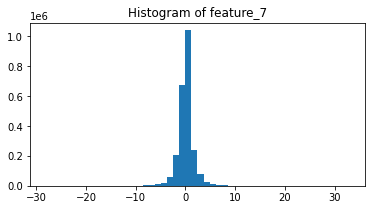

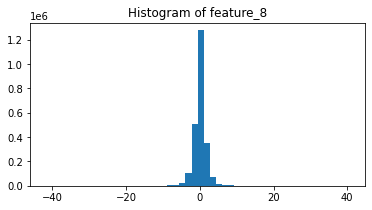

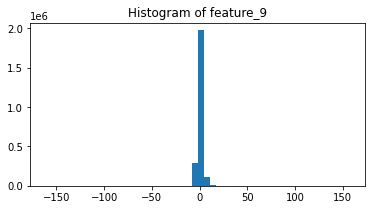

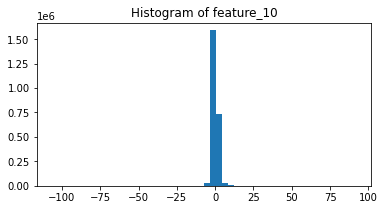

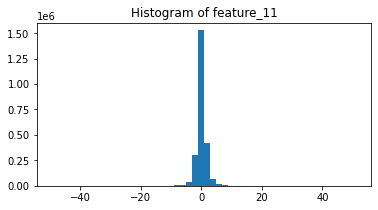

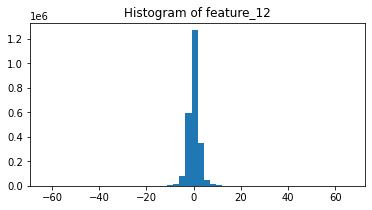

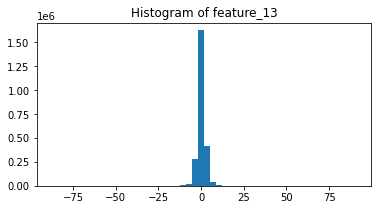

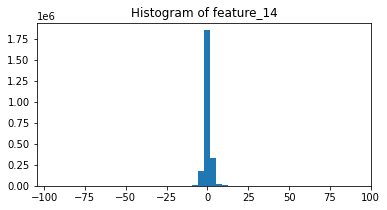

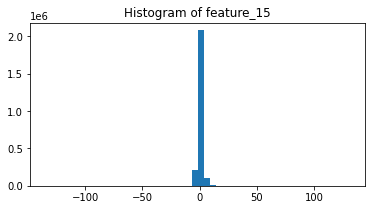

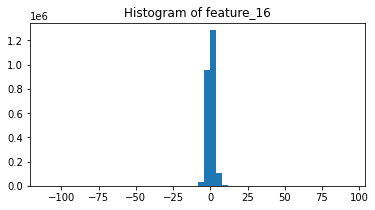

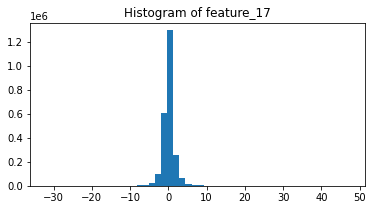

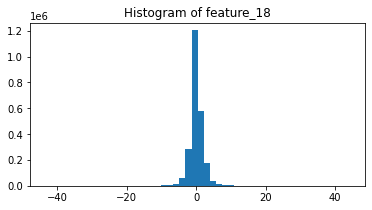

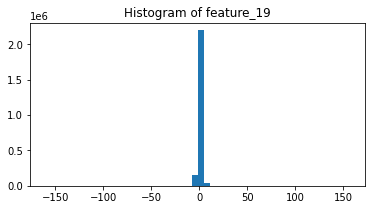

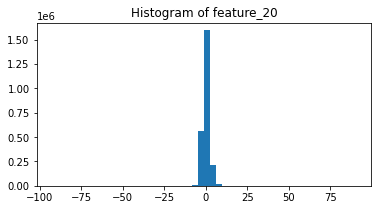

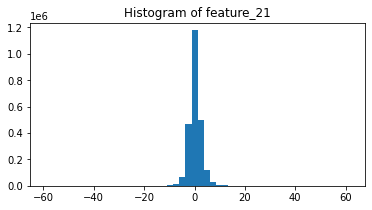

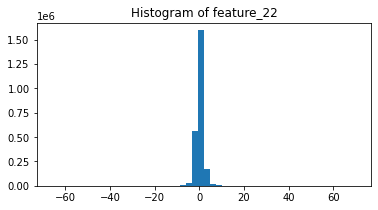

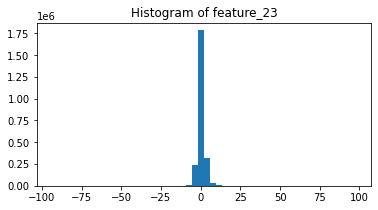

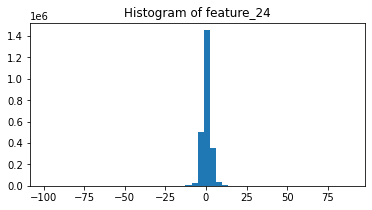

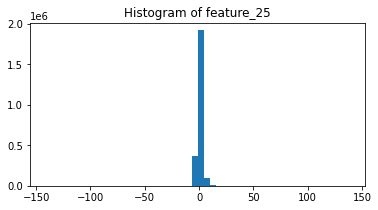

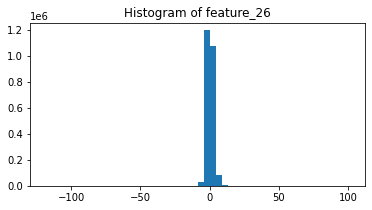

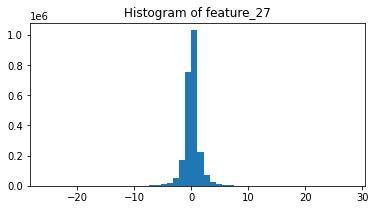

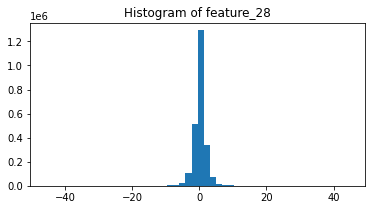

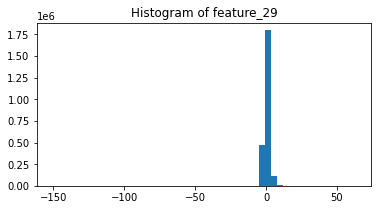

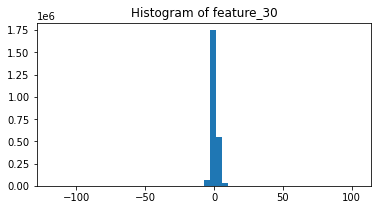

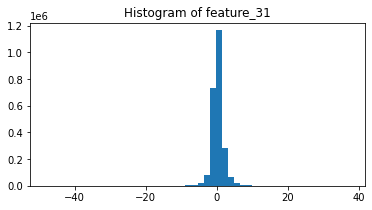

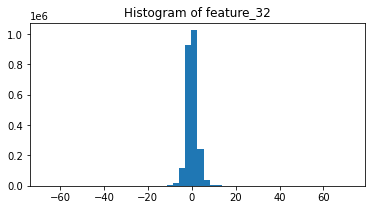

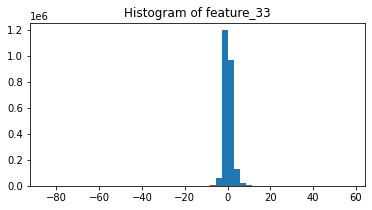

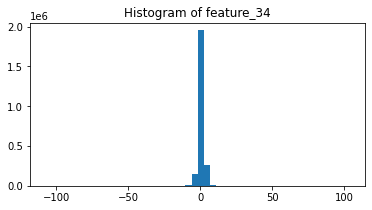

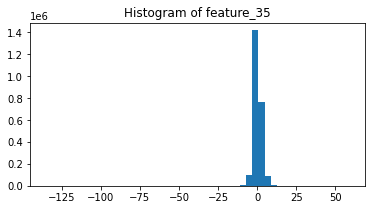

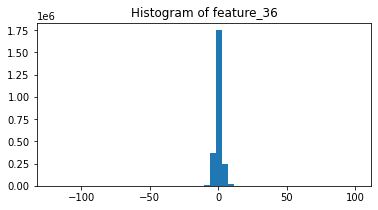

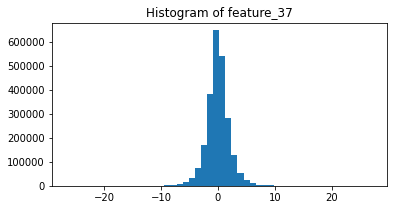

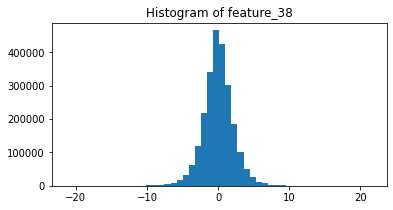

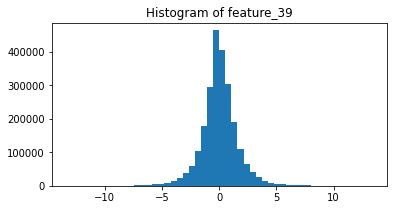

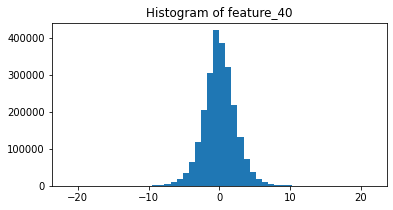

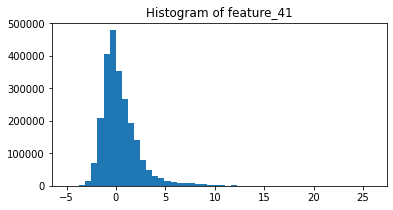

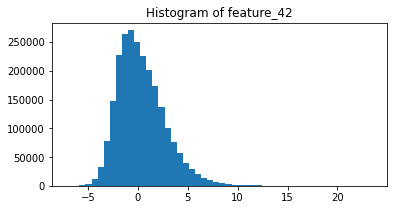

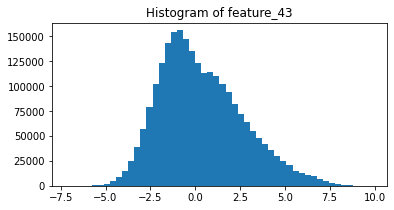

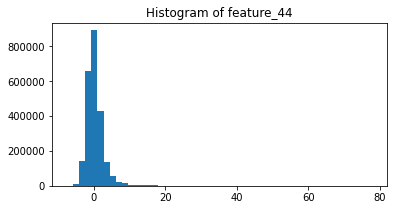

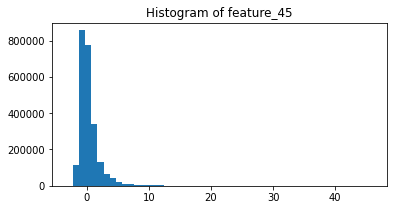

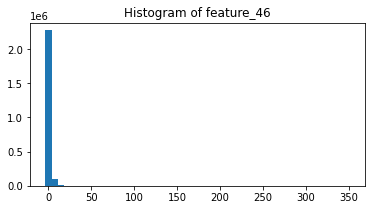

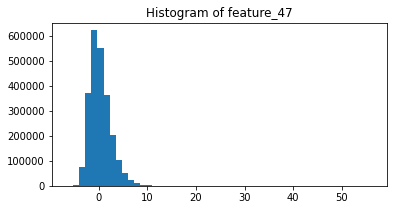

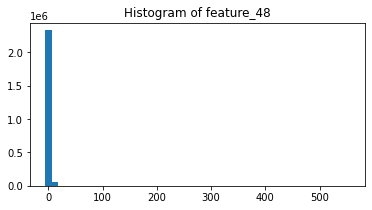

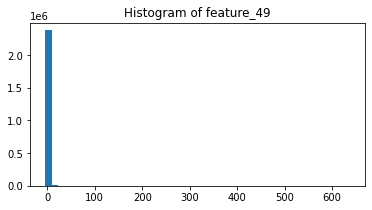

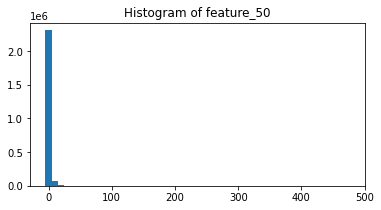

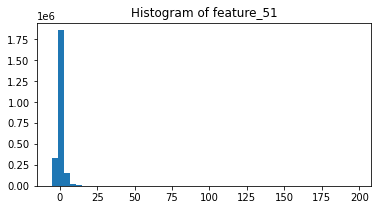

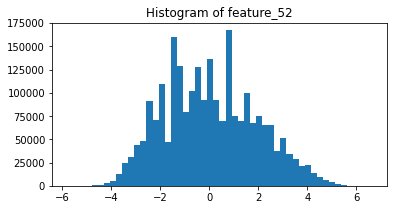

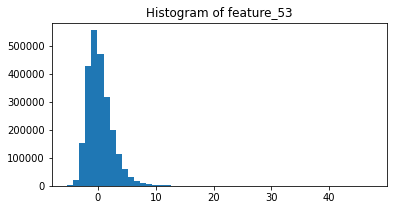

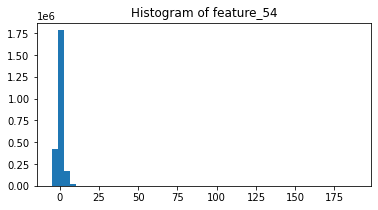

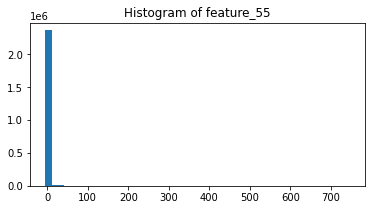

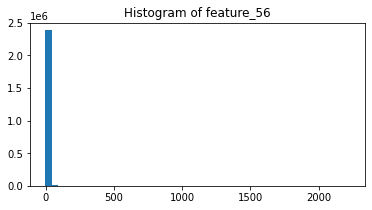

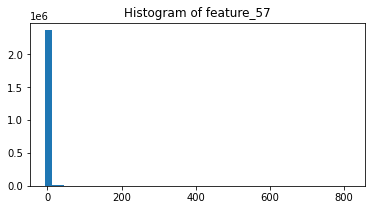

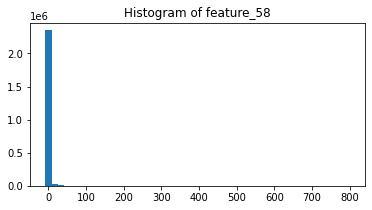

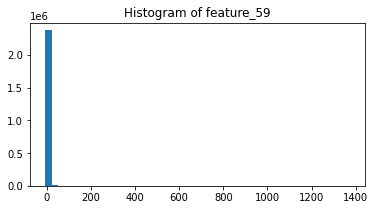

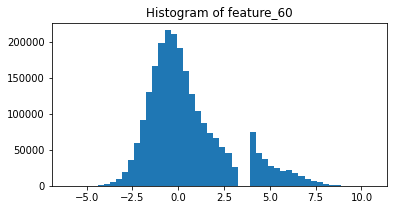

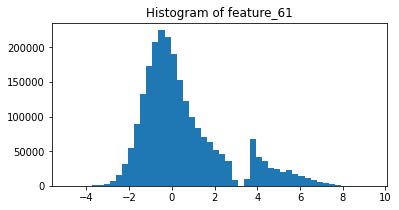

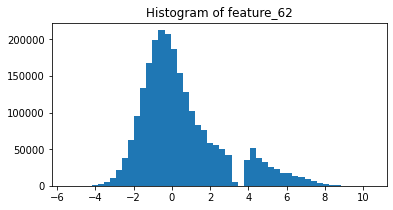

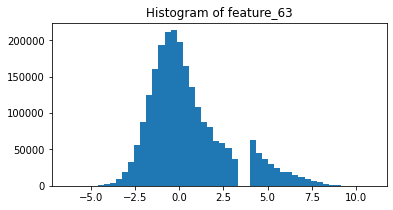

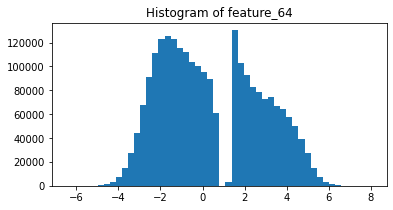

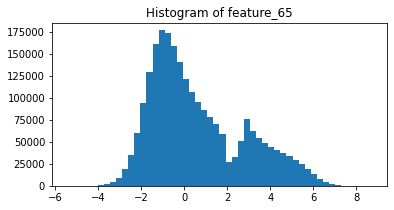

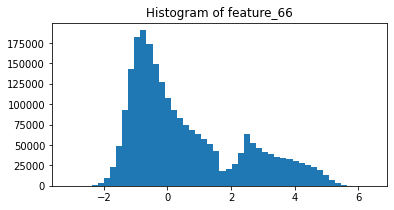

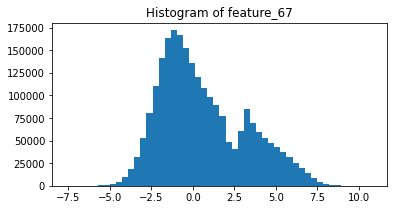

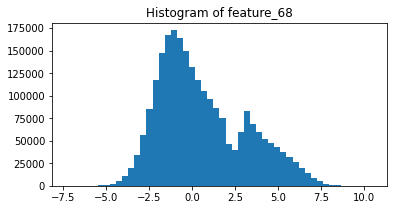

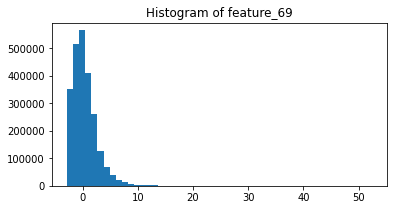

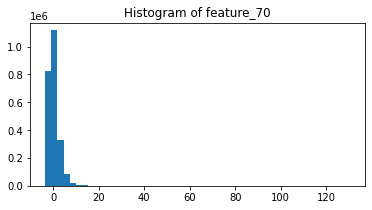

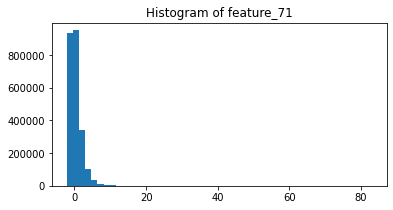

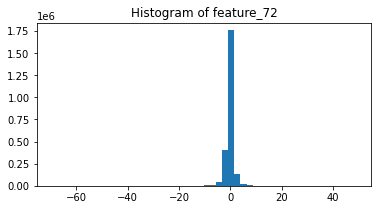

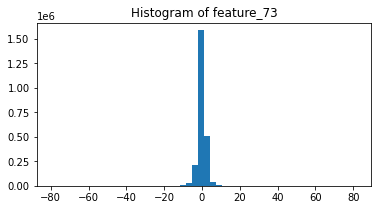

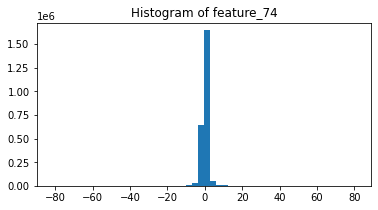

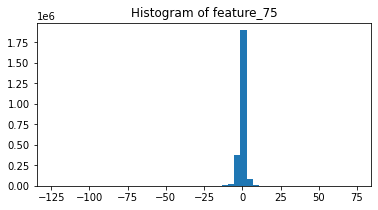

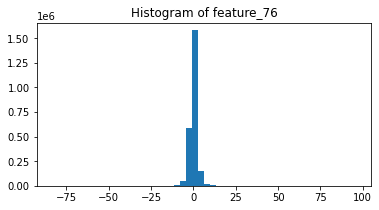

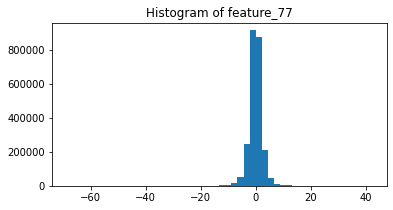

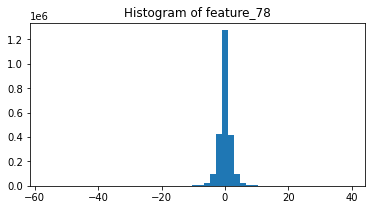

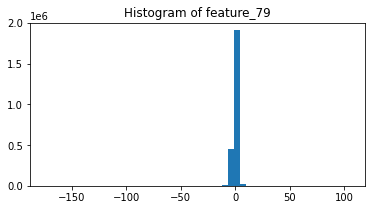

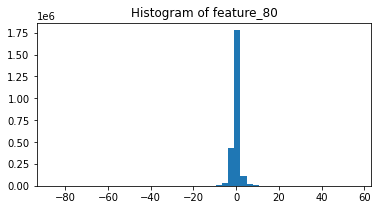

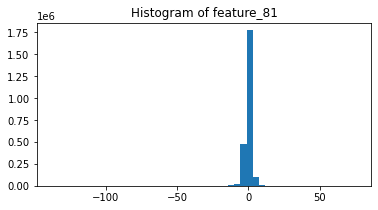

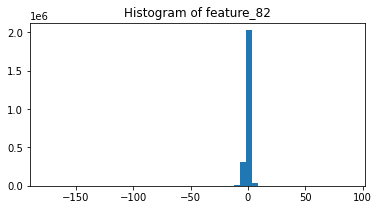

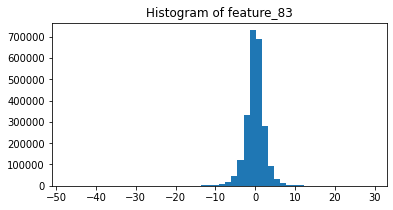

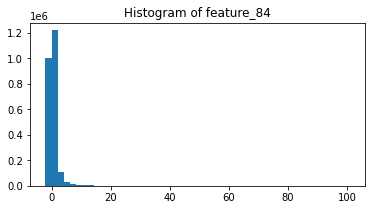

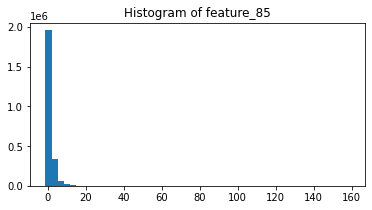

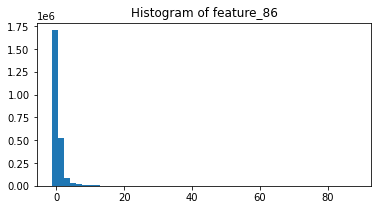

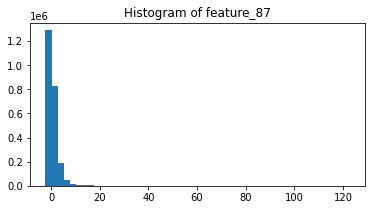

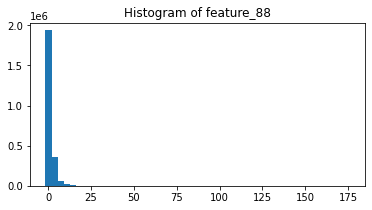

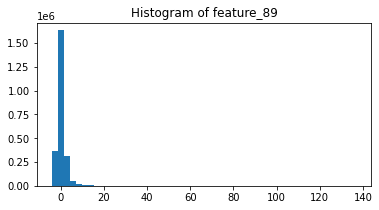

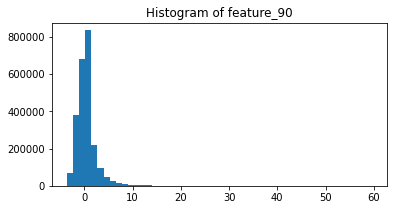

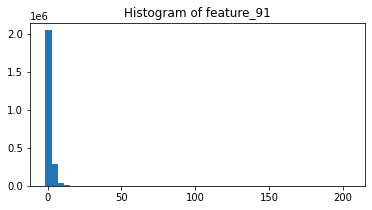

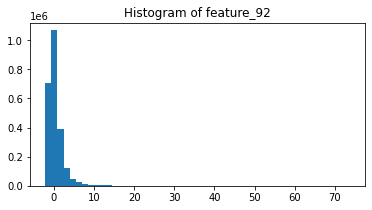

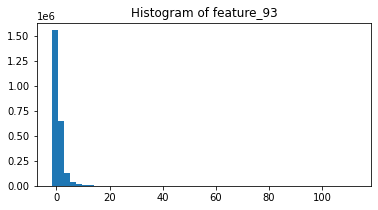

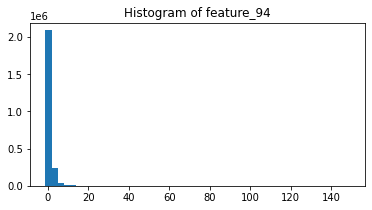

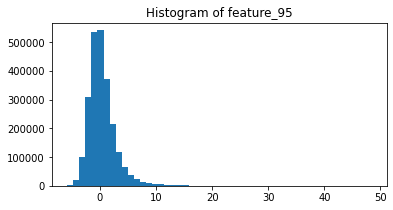

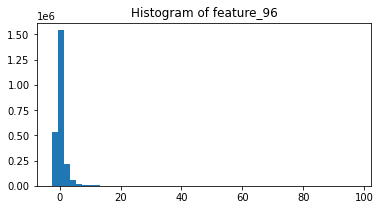

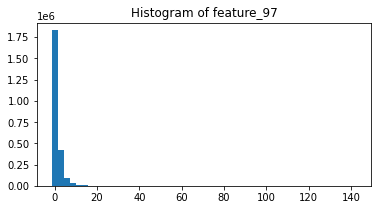

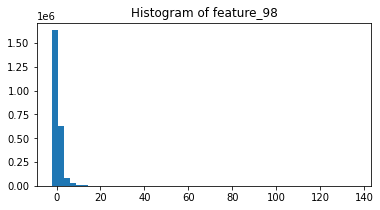

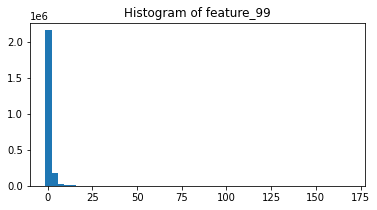

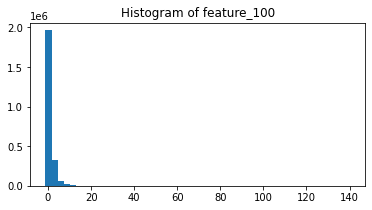

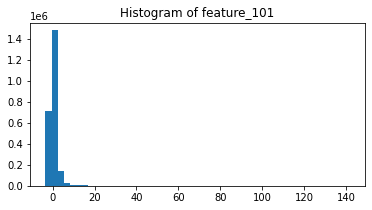

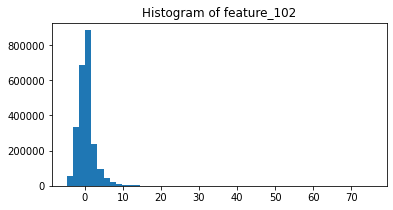

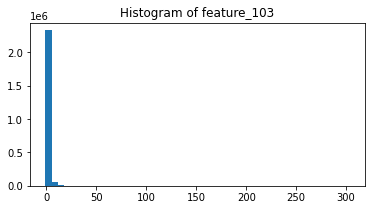

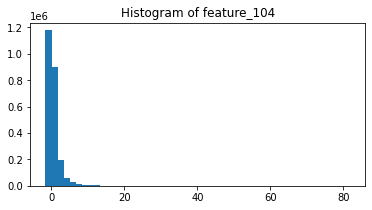

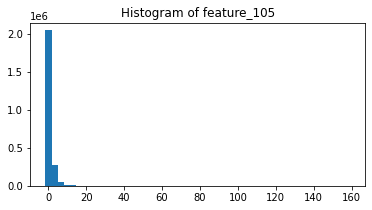

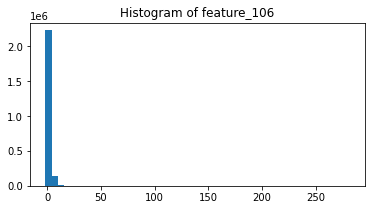

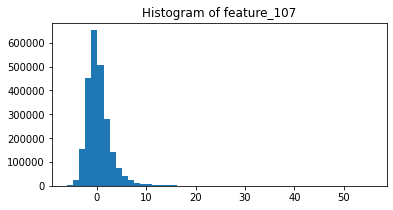

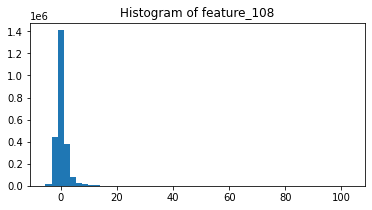

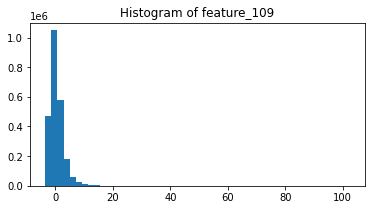

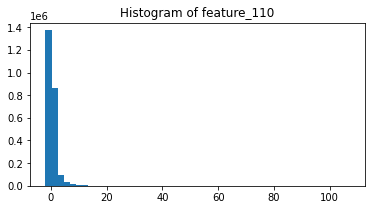

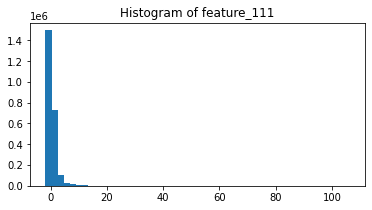

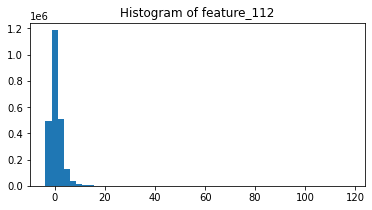

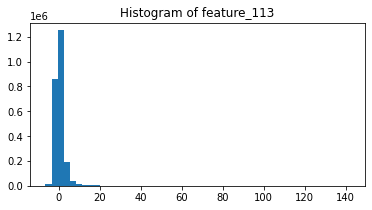

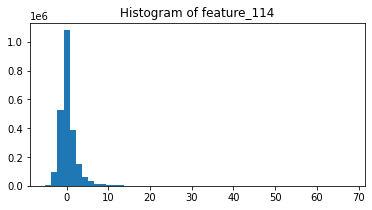

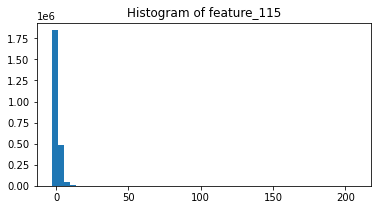

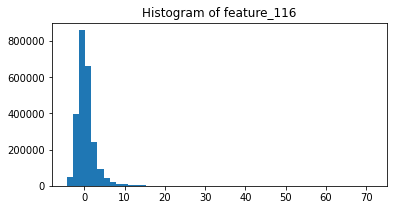

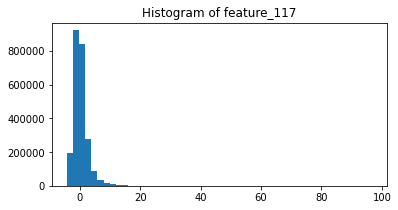

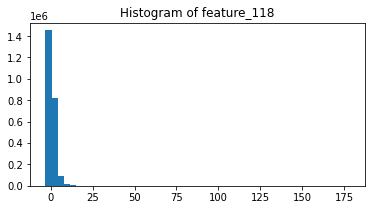

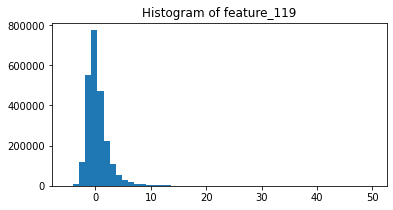

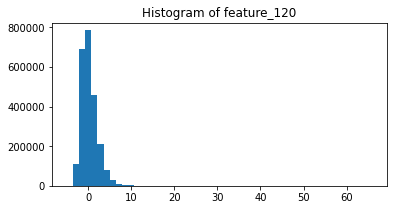

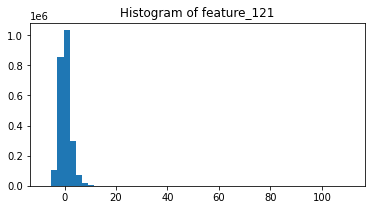

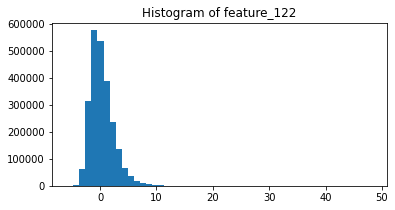

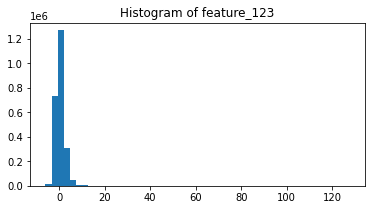

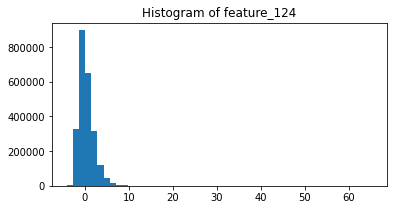

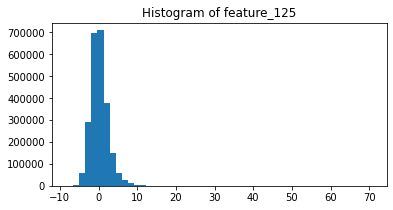

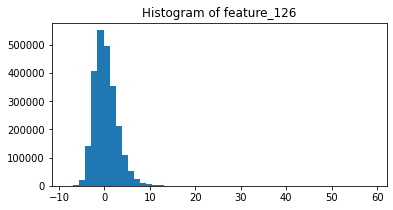

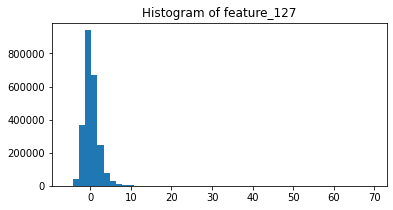

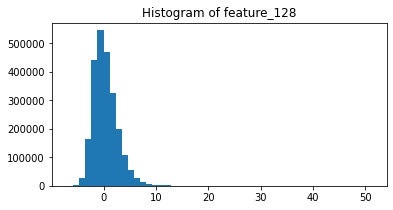

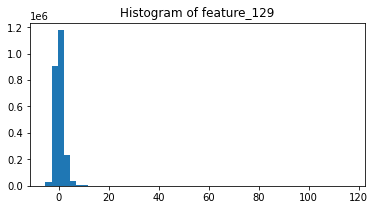

In [21]:
n_bins = 50 # can decrease to get a wider bin (or vice versa)

for column_name in feature_col:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax = plt.hist(train_data[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()

Looking at the response variable along with the weights

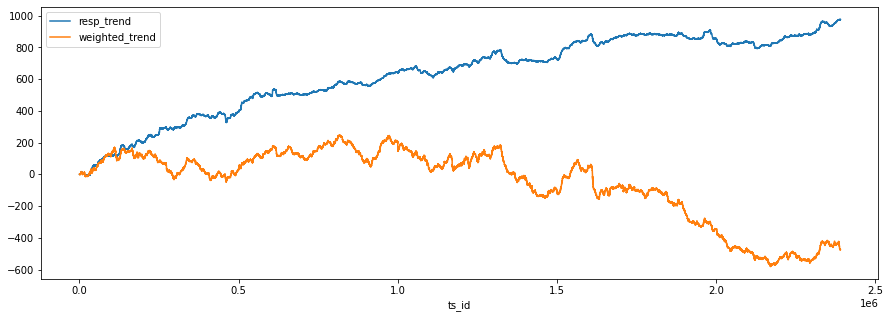

In [22]:
train_data['resp_trend'] = train_data['resp'].cumsum()                                                              
train_data['weighted_trend'] = (train_data['weight']*train_data['resp']).cumsum()                                   
train_data.plot(x='ts_id', y=['resp_trend', 'weighted_trend'],figsize=(15,5))   
plt.show()

/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


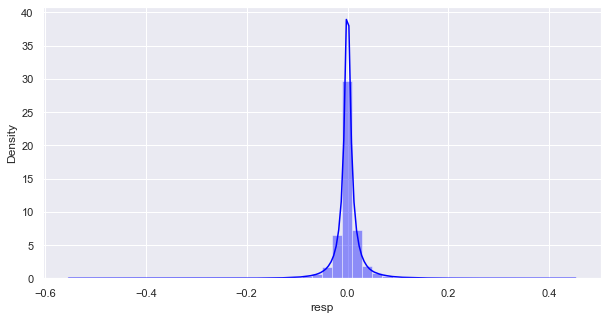

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(train_data["resp"],color='blue')

/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


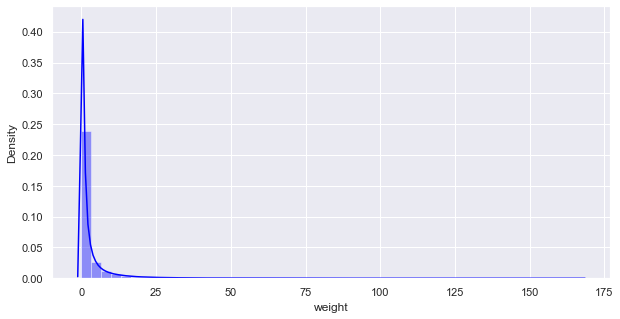

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
#ax = sns.distplot(train_data["weight"].apply(lambda x: np.log1p(x)),color='blue')
ax = sns.distplot(train_data["weight"],color='blue')

In [25]:
# How much of the data has weight > 10
train_data[train_data["weight"] > 25].shape[0] / train_data.shape[0]

0.02044308052195135

/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assi

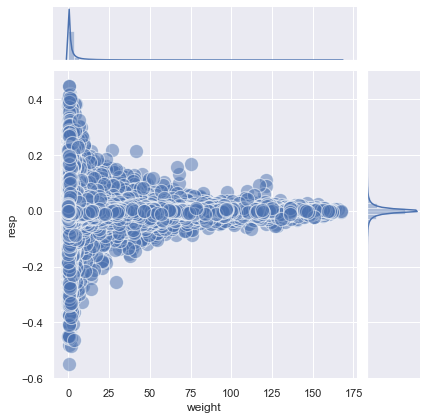

In [26]:
joint_p = sns.JointGrid(data=train_data, x="weight", y="resp")
joint_p.plot_joint(sns.scatterplot, s=200, alpha=.5)
joint_p.plot_marginals(sns.distplot, kde=True)

In [27]:
features = train_data[feature_col]

In [28]:
train_data['weight_resp'] = train_data['weight']*train_data['resp']

In [29]:
resp_feature_corr =  pd.Series([train_data.resp.corr(train_data[feature]) for feature in feature_col],index=feature_col)

/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

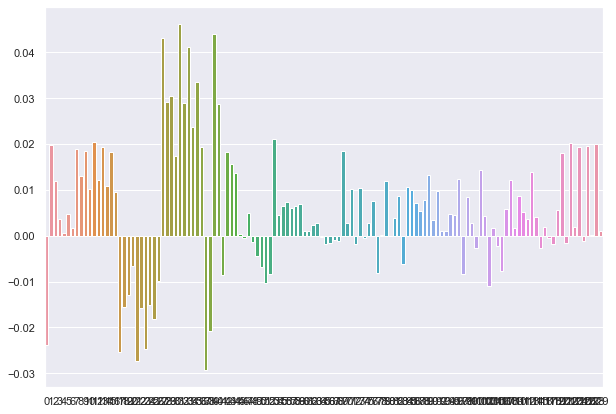

In [30]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot([i for i in range(130)],resp_feature_corr)

In [31]:
train_data_np = features.to_numpy()

In [32]:
pca = PCA(n_components=130)
pca.fit(train_data_np)

PCA(n_components=130)

In [33]:
params = pca.get_params()

In [34]:
def get_min_num(pca,min_exp=0.80):
    """
    Returns number of principle components that are
    necessary to reach a given min explained variance 
    threshold
    """
    explained_var = pca.explained_variance_ratio_.cumsum()
    
    return np.where(explained_var >= min_exp)[0][0] - 1

In [35]:
pca.explained_variance_ratio_.cumsum() >= .90

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
min_idx = get_min_num(pca,min_exp=0.9)

In [37]:
v = pca.components_

In [38]:
v[:min_idx].shape

(21, 130)

In [39]:
def display_component(v, features_list, min_idx, n_weights=10):
    
    # get the list of weights from a row in v, dataframe
    v_1 = v[min_idx,:]

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(min_idx))
    plt.show()

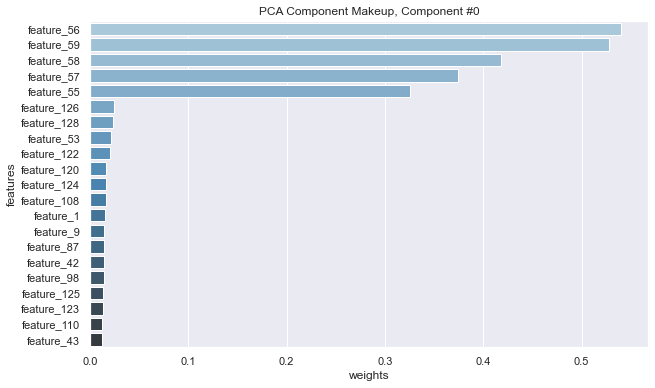

In [48]:
display_component(v,feature_col,0,n_weights=min_idx)

In [41]:
# create dimensionality-reduced data
def create_transformed(pca, features, n_top_components):
    ''' Return a dataframe of data points with component features. 
        The dataframe should be indexed by State-County and contain component values.
        :param train_pca: A list of pca training data, returned by a PCA model.
        :param features: A dataframe of features.
        :param n_top_components: An integer, the number of top components to use.
        :return: A dataframe with n_top_component values as columns.        
     '''
    # create new dataframe to add data to
    transformed= pca.transform(features)

    # keep only the top n components    
    transformed = transformed[:,:n_top_components]
    
    return transformed



In [42]:
projected = create_transformed(pca,features.to_numpy(),n_top_components=min_idx)

In [43]:
projected.shape

(2390491, 21)

In [44]:
comp_cols = [f"c_{i}" for i in range(min_idx)]

In [45]:
projected_df = pd.DataFrame(projected,columns=comp_cols)
projected_df["resp"] = train_data["resp"].copy()

In [46]:
resp_feature_corr_pca =  pd.Series([projected_df.resp.corr(projected_df[feature]) for feature in comp_cols],index=comp_cols)

/Users/davidsewell/.python-virtualenvs/JaneStreetComp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

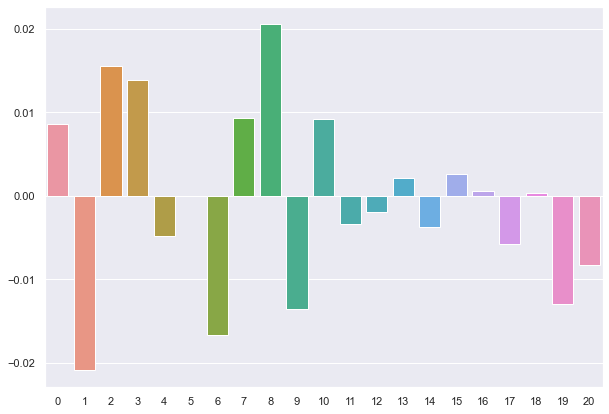

In [47]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot([i for i in range(len(comp_cols))],resp_feature_corr_pca)

In [49]:
corr = projected_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,resp
c_0,1.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.01
c_1,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.02
c_2,0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.02
c_3,0.00,-0.00,-0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.01
c_4,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
c_5,0.00,0.00,-0.00,0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
c_6,-0.00,0.00,0.00,0.00,0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.02
c_7,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,1.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.01
c_8,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.02
c_9,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01


This is unfortunate perhaps Kernel PCA to attempt to find non linear transformation

In [50]:
from sklearn.cluster import KMeans

In [95]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(projected)

In [96]:
def histogram_labels(k_model):
    
    K = len(set(k_model.labels_))
    ax =plt.subplots(figsize=(8,8))
    ax = plt.hist(k_model.labels_, bins=K, color='blue', rwidth=0.5)
    title="Histogram of Cluster Counts"
    plt.title(title, fontsize=12)
    plt.show()

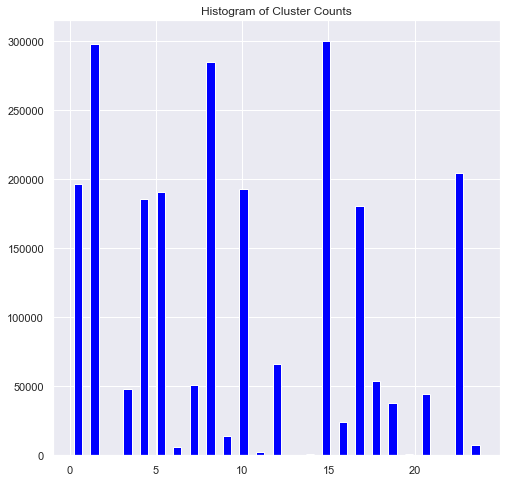

In [97]:
histogram_labels(kmeans)

In [86]:
K = len(set(kmeans.labels_))

In [87]:
def label_count(labels,item):
    
    if item not in labels:
        return 0
    
    return len(np.where(kmeans.labels_ == item)[0])

In [88]:
centroids.shape

(25, 21)

In [89]:
count_dict = {item:label_count(kmeans.labels_,item) for item in range(K)}

In [90]:
centroids = kmeans.cluster_centers_

In [91]:
centroids_df = pd.DataFrame(centroids,columns=[f"c_{i}" for i in range(centroids.shape[1])])

In [92]:
centroids_df.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20
0,-1.086517,-7.753186,-1.366102,3.737242,0.142800,-0.632057,-0.940861,1.532428,1.023714,0.731213,...,-0.053703,-0.010762,-0.114741,-0.019326,-0.201814,0.029407,0.175542,-0.060144,0.071088,-0.025320
1,0.789470,-14.045949,11.272580,9.067425,-0.623772,2.386326,0.334457,-3.629951,-1.330690,-0.887106,...,0.701952,-0.119460,-0.038439,0.219092,0.437662,0.224969,0.011962,0.172303,0.703438,0.419124
2,-2.362892,-1.398126,-3.440785,-7.733093,0.471024,0.537247,1.645958,-1.002138,0.367329,-0.770415,...,0.003998,-0.146771,0.013329,0.017941,0.065203,0.104231,-0.089008,0.084957,-0.134756,0.003547
3,780.183813,-1.240463,-41.863570,-24.276532,177.833856,235.099141,-31.148770,71.047703,-8.808615,-19.913134,...,-5.963338,2.664459,-12.743540,-8.180989,3.159930,5.121621,-5.296081,3.002760,0.870259,-1.314747
4,439.562131,-6.098819,-20.422725,-6.413376,-44.892676,-90.033340,10.307232,-40.931440,6.287577,12.180398,...,2.953757,4.543194,-19.874976,3.109485,1.848035,3.504099,-2.931467,-0.824622,-2.056590,3.434757


In [93]:
def centroid_heatmap(centroids):
    plt.figure(figsize = (12,9))
    ax = sns.heatmap(centroids, cmap = 'YlGnBu')
    ax.set_ylabel("Cluster")
    plt.yticks(fontsize = 16)
    plt.xticks(fontsize = 16)
    ax.set_title("Attribute Value by Centroid")
    plt.show()

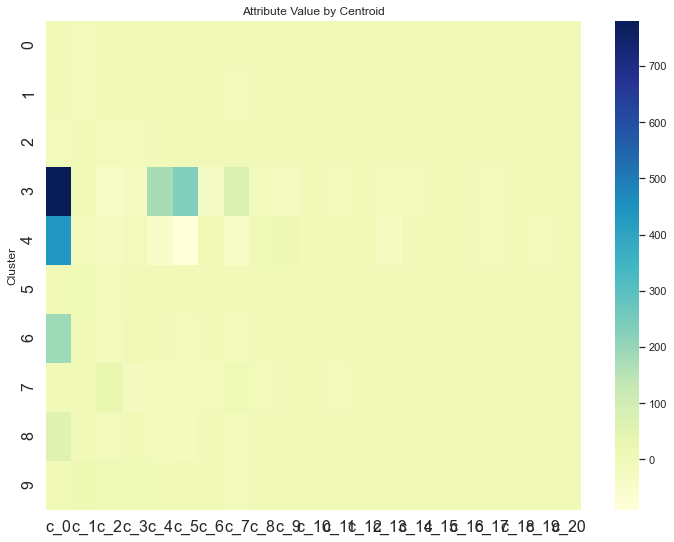

In [94]:
centroid_heatmap(centroids_df)